Abbreviations:
- US: United States
- JP: Japan
- DE: Germany
- UK: United Kingdom
- CA: Canada
- CH: Switzerland
- CN: China
- EU: Eurozone
- 3M: 3-Month Benchmark Government Bond Yield
- 2Y: 2-Year Benchmark Government Bond Yield
- 5Y: 5-Year Benchmark Government Bond Yield
- 10Y: 10-Year Benchmark Government Bond Yield
- 30Y: 30-Year Benchmark Government Bond Yield
- 1M2Y: 1-Month Forward Rate for the 2-Year Government Bond Yield
- 1M10Y: 1-Month Forward Rate for the 10-Year Government Bond Yield
- OECD CLI: OECD Composite Leading Indicator (G20)
- CITI ESI: Citigroup Economic Surprise Index
- CITI ISI: Citigroup Inflation Surprise Index
- BBE GDP: Bloomberg Economics Global GDP Tracker
- M2: M2 Money Supply (Billion USD)
- MSCI CS: MSCI World Cyclical Sectors Net Index (USD)
- MSCI DS: MSCI World Defensive Sectors Net Index (USD)
- HG1: Generic 1st 'HG' Future (USD)
- GC1: Generic 1st 'GC' Future (USD)
- L: Level of Yield Curve
- S: Slope of Yield Curve
- C: Curvature of Yield Curve
- F: Forward
- D: Difference
- G: Growth Rate

This code can also be executed in GitHub's cloud. Our repository can be found under https://github.com/szuercin/Written-assignment. Note that the following packages are not yet installed in GitHub.

In [ ]:
!pip install eikon
!pip install statsmodels
!pip install openpyxl

# Importing and Preprocessing Data

First, we load the packages and set the display options for dataframes.

In [1]:
import pandas as pd
import numpy as np
import eikon as ek
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

Next, we download the data from Refinitiv through the Eikon Data API and from Bloomberg manually through Excel. For the data from Refinitiv, we further check (using the example of the US) whether the data output through the Excel add-in is identical to the one through the API. The reason why we also use Bloomberg is that not all the data we want is available through Refinitiv. The raw data is then stored in an SQL table.

In [3]:
ek.set_app_key('e8e3168e424643f1a0913bc356b3b762cf7f290c')

fields = 'CLOSE'
start_date = '2000-01-31'
end_date = '2023-04-30'
interval = 'monthly'

df = pd.DataFrame()

for i in ['US', 'JP', 'DE', 'GB', 'CA', 'CH']:
    for j in ['3M', '2Y', '5Y', '10Y', '30Y']:
        df_data = ek.get_timeseries([i + j + 'T=RR'], 
                                    fields = fields, 
                                    start_date = start_date, 
                                    end_date = end_date, 
                                    interval = interval)
        if i == 'GB':
            df_data.columns = ['UK' + ' ' + j]
        else:
            df_data.columns = [i + ' ' + j]
        df = pd.concat([df, df_data], axis = 'columns')

df.to_excel(excel_writer = 'Refinitiv Data.xlsx')

In [3]:
df_Refinitiv = pd.read_excel('Refinitiv Data.xlsx', parse_dates = ['Date'], index_col = 'Date')
df_Refinitiv

,US 3M,US 2Y,US 5Y,US 10Y,US 30Y,JP 3M,JP 2Y,JP 5Y,JP 10Y,JP 30Y,DE 3M,DE 2Y,DE 5Y,DE 10Y,DE 30Y,UK 3M,UK 2Y,UK 5Y,UK 10Y,UK 30Y,CA 3M,CA 2Y,CA 5Y,CA 10Y,CA 30Y,CH 3M,CH 2Y,CH 5Y,CH 10Y,CH 30Y
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,5.692,6.6120,6.6850,6.6620,6.4880,0.055,0.296,0.908,1.710,2.275,NaN,4.383000,5.052,5.539,6.082521,6.029,6.588,6.332,5.717976,4.695036,5.13,6.262219,6.549117,6.540936,6.306922,2.05,2.773582,3.236,3.659,4.373715
2000-02-29,5.792,6.5340,6.5930,6.4090,6.1350,0.040,0.289,1.009,1.835,2.424,NaN,4.438000,5.086,5.491,5.861008,6.090,6.324,6.063,5.438091,4.524495,5.00,5.966192,6.183649,6.124736,5.815492,2.40,3.278718,3.518,3.843,4.342131
2000-03-31,5.860,6.4830,6.3160,6.0020,5.8310,0.075,0.413,1.062,1.770,2.210,NaN,4.420000,4.861,5.223,5.579223,6.066,6.257,5.949,5.235379,4.502260,5.29,5.931614,6.020985,5.906783,5.742495,2.80,3.555636,3.864,4.145,4.505159
2000-04-30,5.813,6.6977,6.5398,6.2182,5.9642,0.045,0.339,0.999,1.760,2.143,NaN,4.579049,5.009,5.304,5.597704,6.097,6.262,5.753,5.195970,4.425395,5.49,6.142399,6.246795,6.159352,5.927909,3.12,3.778221,3.865,4.087,4.492127
2000-05-31,5.613,6.6842,6.5672,6.2852,6.0000,0.030,0.294,0.895,1.630,2.160,NaN,4.891955,5.039,5.177,5.373126,6.141,6.297,5.763,5.168391,4.392333,5.68,6.193593,6.162913,6.000269,5.634630,3.10,3.857111,3.984,4.161,4.495940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,4.405,4.4030,3.9640,3.8310,3.9380,-0.155,0.032,0.230,0.418,1.618,1.928,2.730000,2.563,2.562,2.452000,3.443,3.707,3.619,3.669000,3.954000,4.30,4.052000,3.403000,3.291000,3.262000,0.87,1.284000,1.443,1.623,1.641000
2023-01-31,4.693,4.2070,3.6360,3.5290,3.6610,-0.169,-0.018,0.191,0.490,1.603,2.222,2.644000,2.296,2.276,2.216000,3.945,3.452,3.214,3.333000,3.713000,4.41,3.763000,3.031000,2.918000,2.977000,0.98,1.025000,1.130,1.263,1.317000
2023-02-28,4.857,4.7970,4.1680,3.9140,3.9300,-0.167,-0.037,0.216,0.501,1.375,2.687,3.126000,2.718,2.634,2.597000,4.088,3.687,3.705,3.824000,4.135000,4.55,4.211000,3.529000,3.338000,3.209000,1.06,1.241000,1.354,1.450,1.458000


In [4]:
df_Refinitiv_Excel_US = pd.read_excel('Refinitiv Excel Data US.xlsx', header = 1, parse_dates = ['Date'], index_col = 'Date')
df_Refinitiv_Excel_US.columns = ['US 3M', 'US 2Y', 'US 5Y', 'US 10Y', 'US 30Y']
df_Refinitiv_Excel_US.equals(df_Refinitiv[['US 3M', 'US 2Y', 'US 5Y', 'US 10Y', 'US 30Y']])

True

In [5]:
df_Bloomberg = pd.read_excel('Bloomberg Data.xlsx', header = 1, parse_dates = ['Date'], index_col = 'Date')
df_Bloomberg = df_Bloomberg.sort_index(ascending = True)
df_Bloomberg

,CH 1M2Y,CH 1M10Y,US 1M2Y,US 1M10Y,DE 1M2Y,DE 1M10Y,JP 1M2Y,JP 1M10Y,UK 1M2Y,UK 1M10Y,CA 1M2Y,CA 1M10Y,OECD CLI,CITI ESI,CITI ISI,MSCI CS,MSCI DS,HG1,GC1,US M2,EU M2,CN M2,JP M2,UK M2,BBE GDP
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,2.9780,3.7450,6.6245,6.6609,4.5070,5.5604,0.3650,1.7294,6.5462,5.6960,6.3732,6.5296,101.5119,NaN,-3.35,1280.7236,1018.1131,84.95,283.2,4634.7,4019.83,1481.64,NaN,1206.31,NaN
2000-02-29,3.2994,3.8317,6.5568,6.4094,4.5868,5.5213,0.3806,1.8493,6.3776,5.3946,6.0889,6.0995,101.5558,NaN,5.30,1299.3723,996.7261,78.70,294.2,4666.4,3996.41,1492.07,NaN,1191.90,NaN
2000-03-31,3.5640,4.1287,6.4896,5.9958,4.4745,5.2352,0.4830,1.7928,6.3677,5.1766,5.9603,5.9139,101.5555,NaN,6.73,1402.4723,1045.8207,80.50,278.4,4727.0,3967.36,1507.85,NaN,1223.87,NaN
2000-04-28,3.7740,4.0698,6.6995,6.2013,4.6583,5.3169,0.3966,1.7666,6.1248,5.1319,6.1590,6.1575,101.5083,NaN,10.68,1332.9081,1017.0286,79.00,274.7,4800.6,NaN,NaN,NaN,NaN,NaN
2000-05-31,3.8634,4.1535,6.7027,6.2617,4.9818,5.1911,0.3945,1.7175,6.1919,5.0984,6.2358,6.0208,101.4179,NaN,9.87,1276.1580,1028.4512,81.45,271.7,4719.9,3906.91,1536.34,NaN,1184.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30,1.2918,1.5870,4.4122,3.8860,2.7329,2.5809,0.0462,0.4736,3.5307,3.7362,3.9551,3.2876,98.8040,3.9,18.40,3358.7219,3673.6399,381.05,1826.2,21429.0,NaN,NaN,NaN,NaN,0.1
2023-01-31,1.0537,1.2594,4.1536,3.5129,2.5994,2.2855,-0.0125,0.5280,3.1892,3.3875,3.6844,2.9096,98.8021,22.6,6.83,3696.7380,3692.5071,422.60,1929.5,21107.3,16548.62,40532.20,9318.74,3785.76,4.5
2023-02-28,1.3261,1.4389,4.7871,3.9243,3.1385,2.6538,-0.0283,0.5404,3.7184,3.8297,4.1076,3.3206,98.8178,28.2,21.34,3629.3169,3551.6169,409.75,1836.7,21088.5,16091.48,39726.76,8902.88,3718.10,4.6


In [6]:
df_Bloomberg = df_Bloomberg.set_index(df_Refinitiv.index)
df = pd.concat([df_Refinitiv, df_Bloomberg], axis = 'columns')
df

,US 3M,US 2Y,US 5Y,US 10Y,US 30Y,JP 3M,JP 2Y,JP 5Y,JP 10Y,JP 30Y,DE 3M,DE 2Y,DE 5Y,DE 10Y,DE 30Y,UK 3M,UK 2Y,UK 5Y,UK 10Y,UK 30Y,CA 3M,CA 2Y,CA 5Y,CA 10Y,CA 30Y,CH 3M,CH 2Y,CH 5Y,CH 10Y,CH 30Y,CH 1M2Y,CH 1M10Y,US 1M2Y,US 1M10Y,DE 1M2Y,DE 1M10Y,JP 1M2Y,JP 1M10Y,UK 1M2Y,UK 1M10Y,CA 1M2Y,CA 1M10Y,OECD CLI,CITI ESI,CITI ISI,MSCI CS,MSCI DS,HG1,GC1,US M2,EU M2,CN M2,JP M2,UK M2,BBE GDP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,5.692,6.6120,6.6850,6.6620,6.4880,0.055,0.296,0.908,1.710,2.275,NaN,4.383000,5.052,5.539,6.082521,6.029,6.588,6.332,5.717976,4.695036,5.13,6.262219,6.549117,6.540936,6.306922,2.05,2.773582,3.236,3.659,4.373715,2.9780,3.7450,6.6245,6.6609,4.5070,5.5604,0.3650,1.7294,6.5462,5.6960,6.3732,6.5296,101.5119,NaN,-3.35,1280.7236,1018.1131,84.95,283.2,4634.7,4019.83,1481.64,NaN,1206.31,NaN
2000-02-29,5.792,6.5340,6.5930,6.4090,6.1350,0.040,0.289,1.009,1.835,2.424,NaN,4.438000,5.086,5.491,5.861008,6.090,6.324,6.063,5.438091,4.524495,5.00,5.966192,6.183649,6.124736,5.815492,2.40,3.278718,3.518,3.843,4.342131,3.2994,3.8317,6.5568,6.4094,4.5868,5.5213,0.3806,1.8493,6.3776,5.3946,6.0889,6.0995,101.5558,NaN,5.30,1299.3723,996.7261,78.70,294.2,4666.4,3996.41,1492.07,NaN,1191.90,NaN
2000-03-31,5.860,6.4830,6.3160,6.0020,5.8310,0.075,0.413,1.062,1.770,2.210,NaN,4.420000,4.861,5.223,5.579223,6.066,6.257,5.949,5.235379,4.502260,5.29,5.931614,6.020985,5.906783,5.742495,2.80,3.555636,3.864,4.145,4.505159,3.5640,4.1287,6.4896,5.9958,4.4745,5.2352,0.4830,1.7928,6.3677,5.1766,5.9603,5.9139,101.5555,NaN,6.73,1402.4723,1045.8207,80.50,278.4,4727.0,3967.36,1507.85,NaN,1223.87,NaN
2000-04-30,5.813,6.6977,6.5398,6.2182,5.9642,0.045,0.339,0.999,1.760,2.143,NaN,4.579049,5.009,5.304,5.597704,6.097,6.262,5.753,5.195970,4.425395,5.49,6.142399,6.246795,6.159352,5.927909,3.12,3.778221,3.865,4.087,4.492127,3.7740,4.0698,6.6995,6.2013,4.6583,5.3169,0.3966,1.7666,6.1248,5.1319,6.1590,6.1575,101.5083,NaN,10.68,1332.9081,1017.0286,79.00,274.7,4800.6,NaN,NaN,NaN,NaN,NaN
2000-05-31,5.613,6.6842,6.5672,6.2852,6.0000,0.030,0.294,0.895,1.630,2.160,NaN,4.891955,5.039,5.177,5.373126,6.141,6.297,5.763,5.168391,4.392333,5.68,6.193593,6.162913,6.000269,5.634630,3.10,3.857111,3.984,4.161,4.495940,3.8634,4.1535,6.7027,6.2617,4.9818,5.1911,0.3945,1.7175,6.1919,5.0984,6.2358,6.0208,101.4179,NaN,9.87,1276.1580,1028.4512,81.45,271.7,4719.9,3906.91,1536.34,NaN,1184.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,4.405,4.4030,3.9640,3.8310,3.9380,-0.155,0.032,0.230,0.418,1.618,1.928,2.730000,2.563,2.562,2.452000,3.443,3.707,3.619,3.669000,3.954000,4.30,4.052000,3.403000,3.291000,3.262000,0.87,1.284000,1.443,1.623,1.641000,1.2918,1.5870,4.4122,3.8860,2.7329,2.5809,0.0462,0.4736,3.5307,3.7362,3.9551,3.2876,98.8040,3.9,18.40,3358.7219,3673.6399,381.05,1826.2,21429.0,NaN,NaN,NaN,NaN,0.1
2023-01-31,4.693,4.2070,3.6360,3.5290,3.6610,-0.169,-0.018,0.191,0.490,1.603,2.222,2.644000,2.296,2.276,2.216000,3.945,3.452,3.214,3.333000,3.713000,4.41,3.763000,3.031000,2.918000,2.977000,0.98,1.025000,1.130,1.263,1.317000,1.0537,1.2594,4.1536,3.5129,2.5994,2.2855,-0.0125,0.5280,3.1892,3.3875,3.6844,2.9096,98.8021,22.6,6.83,3696.7380,3692.5071,422.60,1929.5,21107.3,16548.62,40532.20,9318.74,3785.76,4.5
2023-02-28,4.857,4.7970,4.1680,3.9140,3.9300,-0.167,-0.037,0.216,0.501,1.375,2.687,3.126000,2.718,2.634,2.597000,4.088,3.687,3.705,3.824000,4.135000,4.55,4.211000,3.529000,3.338000,3.209000,1.06,1.241000,1.354,1.450,1.458000,1.3261,1.4389,4.7871,3.9243,3.1385,2.6538,-0.0283,0.5404,3.7184,3.8297,4.1076,3.3206,98.8178,28.2,21.34,3629.3169,3551.6169,409.75,1836.7,21088.5,16091.48,39726.76,8902.88,3718.10,4.6


In [7]:
con = sqlite3.connect('Database.db')
df.to_sql(name = 'RAW', con = con, if_exists = 'replace')
con.close()

Next, we take the time series that we want to predict, that is the two- and ten-year government bond yields of the United States, Japan, Germany, the United Kingdom, Canada, and Switzerland, and apply the Augmented Dickey-Fuller unit root test for their level as well as for their first difference (results are stored in SQL table ADF_DV). But first, we take a quick look at their plots. The vertical line, labeled Pre-/Post-GFC, marks the end of April 2009, which is the first month after the Global Financial Crisis for which Bloomberg's Global GDP Tracker returned a positive value. We therefore consider this month to be a valid starting point for our period of analysis.

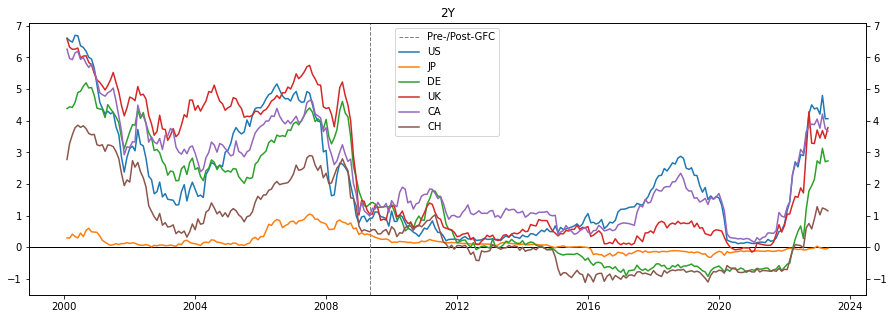

<Figure size 432x288 with 0 Axes>

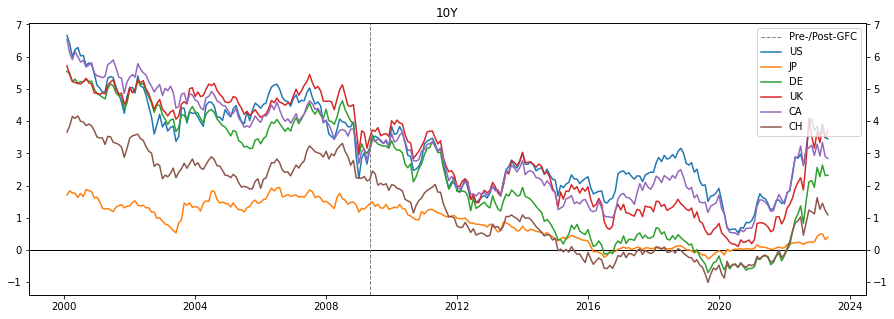

<Figure size 432x288 with 0 Axes>

In [8]:
for i in ['2Y', '10Y']:
    plt.figure(figsize = (15, 5))
    ax1 = plt.gca()
    ax1.axhline(y = 0, color = 'black', linewidth = 1)
    date = mdates.datestr2num('2009-04-30')
    ax1.axvline(x = date, color = 'grey', linestyle = '--', linewidth = 1, label = 'Pre-/Post-GFC')
    for j in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
        ax1.plot(df[j + ' ' + i], label = j)
    ax1.legend()
    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())
    plt.title(i)
    plt.show()
    plt.clf()

In [9]:
df_ADF = pd.DataFrame(index = np.array(['ADF Statistic (Level)', 
                                        'P-Value (Level)', 
                                        'ADF Statistic (First Difference)', 
                                        'P-Value (First Difference)']))

for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['2Y', '10Y']:
        series_level = df[i + ' ' + j].loc['2009-04-30':]
        series_difference = df[i + ' ' + j].loc['2009-03-31':].diff().dropna()
        result_level = adfuller(series_level)
        result_difference = adfuller(series_difference)
        df_ADF[i + ' ' + j] = np.array([result_level[0], result_level[1], result_difference[0], result_difference[1]]).round(4)

con = sqlite3.connect('Database.db')
df_ADF.to_sql(name = 'ADF_DV', con = con, if_exists = 'replace')
con.close()
        
df_ADF

,US 2Y,US 10Y,JP 2Y,JP 10Y,DE 2Y,DE 10Y,UK 2Y,UK 10Y,CA 2Y,CA 10Y,CH 2Y,CH 10Y
ADF Statistic (Level),-2.7483,-2.1639,-2.7129,-2.1184,-1.6161,-1.5999,-2.1335,-1.4248,-4.1610,-2.2302,-0.7319,-1.9752
P-Value (Level),0.0661,0.2196,0.0718,0.2372,0.4748,0.4836,0.2313,0.5703,0.0008,0.1955,0.8383,0.2975
ADF Statistic (First Difference),-3.5520,-11.5781,-13.9218,-13.6257,-5.0158,-13.9005,-2.0446,-13.2808,-7.2433,-8.2019,-6.4386,-14.7047
P-Value (First Difference),0.0067,0.0000,0.0000,0.0000,0.0000,0.0000,0.2674,0.0000,0.0000,0.0000,0.0000,0.0000


While we cannot reject the null hypothesis of a unit root in the level of most of these yield series at any meaningful significance level, we can do so for the first difference, meaning that differencing these yield series makes them stationary. Unfortunately, this is not the case for the first difference of the UK's two-year yield series. From a pure visual inspection, it is not so clear whether this series is stationary or not. We decide to run the subsequent analysis and to report the results for this series as well, but we keep in mind that these results can be spurious. 

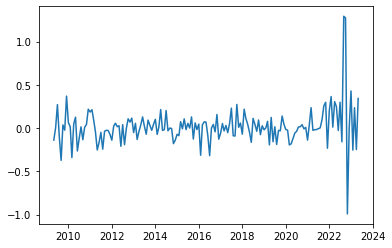

In [10]:
plt.plot(df['UK 2Y'].loc['2009-03-31':].diff().dropna())
plt.show()

In [11]:
for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['2Y', '10Y']:
        df[i + ' ' + j + ' D'] = df[i + ' ' + j].diff()

Next, we clean and prepare our predictor variables. Since the M2 money supply series for China, the Eurozone, Japan, and the United Kingdom is not complete, we decide to take the last available value for each month without data. We further limit our dataset to the Post-GFC period, that is we drop observations before February 2009. We will need February and March 2009 to calculate changes in March 2009.

In [12]:
df = df.sort_index(ascending = False)
df['CN M2'] = df['CN M2'].fillna(method = 'bfill')
df['EU M2'] = df['EU M2'].fillna(method = 'bfill')
df['JP M2'] = df['JP M2'].fillna(method = 'bfill')
df['UK M2'] = df['UK M2'].fillna(method = 'bfill')
df = df.sort_index(ascending = True)

In [13]:
df = df[df.index >= pd.to_datetime('2009-02-28')]

In [14]:
df.describe()

,US 3M,US 2Y,US 5Y,US 10Y,US 30Y,JP 3M,JP 2Y,JP 5Y,JP 10Y,JP 30Y,DE 3M,DE 2Y,DE 5Y,DE 10Y,DE 30Y,UK 3M,UK 2Y,UK 5Y,UK 10Y,UK 30Y,CA 3M,CA 2Y,CA 5Y,CA 10Y,CA 30Y,CH 3M,CH 2Y,CH 5Y,CH 10Y,CH 30Y,CH 1M2Y,CH 1M10Y,US 1M2Y,US 1M10Y,DE 1M2Y,DE 1M10Y,JP 1M2Y,JP 1M10Y,UK 1M2Y,UK 1M10Y,CA 1M2Y,CA 1M10Y,OECD CLI,CITI ESI,CITI ISI,MSCI CS,MSCI DS,HG1,GC1,US M2,EU M2,CN M2,JP M2,UK M2,BBE GDP,US 2Y D,US 10Y D,JP 2Y D,JP 10Y D,DE 2Y D,DE 10Y D,UK 2Y D,UK 10Y D,CA 2Y D,CA 10Y D,CH 2Y D,CH 10Y D
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.704370,1.085579,1.681713,2.326292,3.037322,-0.038743,-0.009275,0.099041,0.446427,1.270608,-0.142870,0.064538,0.444388,1.062205,1.674982,0.604053,0.723924,1.280924,1.934632,2.611795,0.965497,1.283041,1.626813,2.067380,2.510234,-0.385673,-0.267860,0.075708,0.463421,0.882830,-0.319579,0.476923,1.126858,2.364322,0.083612,1.096834,-0.012573,0.470187,0.799532,2.009313,1.309871,2.116581,99.749166,7.097076,0.935205,2184.529087,2321.557901,318.483041,1431.031579,13439.800585,12965.905497,22431.985789,9102.617310,3297.518363,3.495906,0.018164,0.003515,-0.002901,-0.005216,0.006988,-0.005708,0.013474,0.000088,0.013111,-0.001310,0.003778,-0.006649
std,1.122768,1.056190,0.845943,0.779350,0.797506,0.141654,0.157948,0.259111,0.482955,0.627657,0.682054,0.881397,1.056092,1.199377,1.244063,0.735672,0.776627,0.905839,1.073974,1.153255,0.893964,0.825231,0.760061,0.787039,0.755817,0.552523,0.626844,0.856790,0.850186,0.856466,0.611273,0.846879,1.048826,0.782379,0.900599,1.209879,0.159816,0.489841,0.791275,1.099947,0.818564,0.794599,1.433547,30.402768,22.546153,954.805323,708.309377,68.863633,276.216238,4180.210831,1911.281828,9218.629278,935.776056,311.560964,1.733014,0.190776,0.231786,0.033987,0.069188,0.167868,0.208713,0.212438,0.254046,0.191623,0.211582,0.133559,0.167074
min,-0.010200,0.111000,0.214000,0.536000,1.197000,-0.379000,-0.322000,-0.358000,-0.275000,0.141000,-0.983000,-0.921000,-0.949000,-0.707000,-0.218000,-0.083000,-0.155000,-0.119000,0.106000,0.572000,0.065000,0.158000,0.321000,0.468000,0.926000,-1.390000,-1.113000,-1.113000,-1.008000,-0.566000,-1.279500,-1.018900,0.112600,0.570100,-0.945000,-0.694000,-0.332900,-0.266000,-0.146400,0.118200,0.173200,0.490100,89.744200,-80.700000,-26.280000,640.162200,989.725100,152.600000,891.200000,8292.400000,10206.300000,6961.640000,7350.380000,2651.950000,-4.100000,-0.735000,-0.559000,-0.172000,-0.180000,-0.440000,-0.556000,-0.992000,-0.564000,-0.729000,-0.614000,-0.380000,-0.567000
25%,0.050850,0.317000,1.036500,1.779000,2.594000,-0.147500,-0.133000,-0.103000,0.046500,0.689000,-0.646500,-0.652500,-0.396500,0.156000,0.772500,0.361000,0.326500,0.624500,1.187000,1.710500,0.455000,0.712500,1.042500,1.500000,2.017000,-0.850000,-0.791000,-0.587500,-0.219000,0.239500,-0.827700,-0.208100,0.363800,1.808900,-0.651450,0.183350,-0.137100,0.058600,0.330250,1.236600,0.730300,1.536800,99.464650,-12.350000,-12.555000,1343.522250,1682.644000,268.250000,1223.700000,10064.400000,11565.115000,14566.190000,8460.560000,3119.635000,2.850000,-0.047000,-0.139500,-0.019000,-0.044500,-0.072000,-0.125000,-0.071000,-0.146500,-0.071000,-0.136000,-0.064000,-0.101500
50%,0.137000,0.688000,1.618000,2.326000,2.985000,-0.071000,-0.024000,0.065000,0.304000,1.344000,-0.275000,-0.184000,0.080000,0.693000,1.338000,0.463000

As our dataset is now complete, we proceed by calculating the three yield curve measures for each country, by taking the return differential between cyclical sectors and defensive sectors as well as the return differential between copper and gold, and by summing up the money supply of the five largest economies.

In [15]:
for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    df[i + ' L'] = df[[i + ' 3M', i + ' 2Y', i + ' 5Y', i + ' 10Y', i + ' 30Y']].mean(axis = 'columns')
    df[i + ' S'] = df[i + ' 10Y'] - df[i + ' 2Y']
    df[i + ' C'] = (df[i + ' 10Y'] - df[i + ' 5Y']) - (df[i + ' 5Y'] - df[i + ' 2Y'])

In [16]:
df['MSCI CS-DS'] = (df['MSCI CS'].pct_change() - df['MSCI DS'].pct_change()) * 100
df['HG1-GC1'] = (df['HG1'].pct_change() - df['GC1'].pct_change()) * 100

In [17]:
df['M2 G'] = df[['US M2', 'EU M2', 'CN M2', 'JP M2', 'UK M2']].sum(axis = 'columns').pct_change() * 100

In addition, we adjust the predictor variables with respect to the first-differenced dependent variables. We then test them for a unit root as well (results are stored in SQL table ADF_IV). 

In [18]:
for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['L', 'S', 'C']:
        df[i + ' ' + j + ' D'] = df[i + ' ' + j].diff()

In [19]:
for i in ['OECD CLI', 'CITI ESI', 'CITI ISI', 'BBE GDP']:
    df[i + ' D'] = df[i].diff()

In [20]:
df_ADF = pd.DataFrame(index = np.array(['ADF Statistic', 'P-Value']))

for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['L D', 'S D', 'C D']:
        series = df[i + ' ' + j]
        result = adfuller(series.dropna())
        df_ADF[i + ' ' + j] = np.array([result[0], result[1]]).round(4)
        
for i in ['OECD CLI D', 'CITI ESI D', 'CITI ISI D', 'BBE GDP D', 'M2 G', 'MSCI CS-DS', 'HG1-GC1']:
    series = df[i]
    result = adfuller(series.dropna())
    df_ADF[i] = np.array([result[0], result[1]]).round(4)
    
con = sqlite3.connect('Database.db')
df_ADF.to_sql(name = 'ADF_IV', con = con, if_exists = 'replace')
con.close()
    
df_ADF

,US L D,US S D,US C D,JP L D,JP S D,JP C D,DE L D,DE S D,DE C D,UK L D,UK S D,UK C D,CA L D,CA S D,CA C D,CH L D,CH S D,CH C D,OECD CLI D,CITI ESI D,CITI ISI D,BBE GDP D,M2 G,MSCI CS-DS,HG1-GC1
ADF Statistic,-6.934,-10.729,-14.1195,-12.023,-10.2891,-11.692,-4.3308,-13.0657,-5.538,-2.9412,-15.2783,-4.3951,-7.2057,-12.2777,-11.0748,-5.8589,-14.0074,-6.9098,-8.5323,-5.5273,-3.4205,-9.7901,-7.8963,-12.3653,-5.8511
P-Value,0.000,0.000,0.0000,0.000,0.0000,0.000,0.0004,0.0000,0.000,0.0408,0.0000,0.0003,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0103,0.0000,0.0000,0.0000,0.0000


At a significance level of 0.05, we can reject the null hypothesis of a unit root for all the predictor variables, even for the first difference in the level of UK yields.

For each country, we now create a dataframe with all the variables relevant to the subsequent analysis. Additionally, we include the monthly yield changes priced into forward rates, providing a benchmark for active yield management. We refrain from including these forward implied yield changes into our models as predictor variables, since around half of these series are nonstationary, that is the null hypothesis of the Dickey-Fuller test cannot be rejected (results are stored in SQL table ADF_F). Each dataframe is then stored in a separate SQL table. 

In [21]:
for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['2Y', '10Y']:
        df[i + ' ' + j + ' D F'] = (df[i + ' 1M' + j] - df[i + ' ' + j]).shift(1)

In [22]:
df_ADF = pd.DataFrame(index = np.array(['ADF Statistic', 'P-Value']))

for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['2Y D F', '10Y D F']:
        series = df[i + ' ' + j]
        result = adfuller(series.dropna())
        df_ADF[i + ' ' + j] = np.array([result[0], result[1]]).round(4)

con = sqlite3.connect('Database.db')
df_ADF.to_sql(name = 'ADF_F', con = con, if_exists = 'replace')
con.close()
        
df_ADF

,US 2Y D F,US 10Y D F,JP 2Y D F,JP 10Y D F,DE 2Y D F,DE 10Y D F,UK 2Y D F,UK 10Y D F,CA 2Y D F,CA 10Y D F,CH 2Y D F,CH 10Y D F
ADF Statistic,-2.7057,-1.0218,-4.2066,-1.3137,-4.2241,-0.9226,-2.9099,-1.7053,-1.3343,-4.8615,-4.5901,-5.3107
P-Value,0.0731,0.7452,0.0006,0.6229,0.0006,0.7804,0.0442,0.4284,0.6134,0.0000,0.0001,0.0000


In [23]:
con = sqlite3.connect('Database.db')

for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    df_country = pd.DataFrame(index = df.index)
    for j in ['2Y D', '10Y D']:
        df_country[j] = df[i + ' ' + j]
        df_country[j + ' F'] = df[i + ' ' + j + ' F']
    for j in ['L D', 'S D', 'C D']:
        df_country[j] = df[i + ' ' + j]
    for j in ['OECD CLI D', 'CITI ESI D', 'CITI ISI D', 'BBE GDP D', 'M2 G', 'MSCI CS-DS', 'HG1-GC1']:
        df_country[j] = df[j]
    df_country.to_sql(name = i, con = con, if_exists = 'replace')

con.close()

# Descriptive Plots

While we have already looked at plots of our dependent variables, we now want to get an overview of our predictor variables.

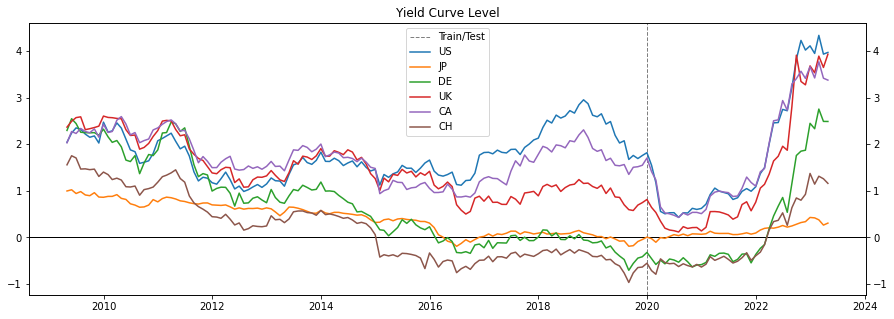

<Figure size 432x288 with 0 Axes>

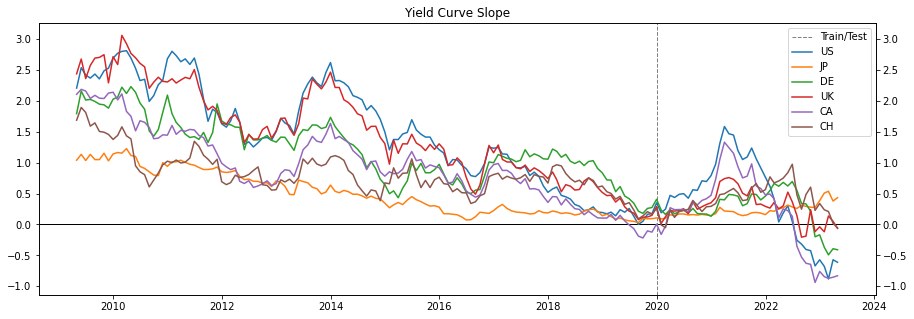

<Figure size 432x288 with 0 Axes>

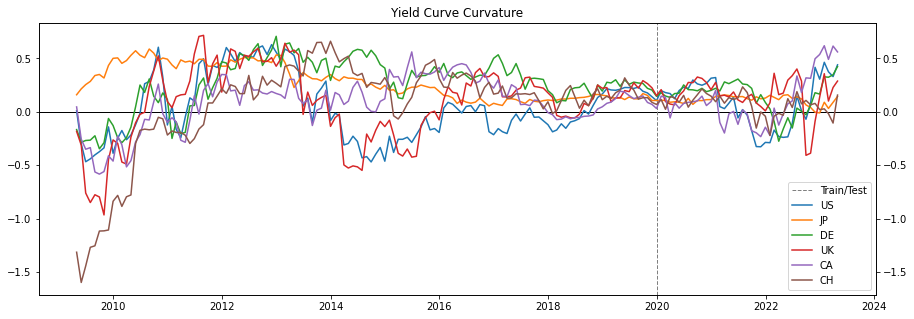

<Figure size 432x288 with 0 Axes>

In [24]:
for i in ['L', 'S', 'C']:
    plt.figure(figsize = (15, 5))
    ax1 = plt.gca()
    ax1.axhline(y = 0, color = 'black', linewidth = 1)
    date = mdates.datestr2num('2019-12-31')
    ax1.axvline(x = date, color = 'grey', linestyle = '--', linewidth = 1, label = 'Train/Test')
    for j in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
        ax1.plot(df.loc[df.index >= pd.to_datetime('2009-04-30')][j + ' ' + i], label = j)
    ax1.legend()
    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())
    if i == 'L':
        plt.title('Yield Curve Level')
    if i == 'S':
        plt.title('Yield Curve Slope')
    if i == 'C':
        plt.title('Yield Curve Curvature')
    plt.show()
    plt.clf()

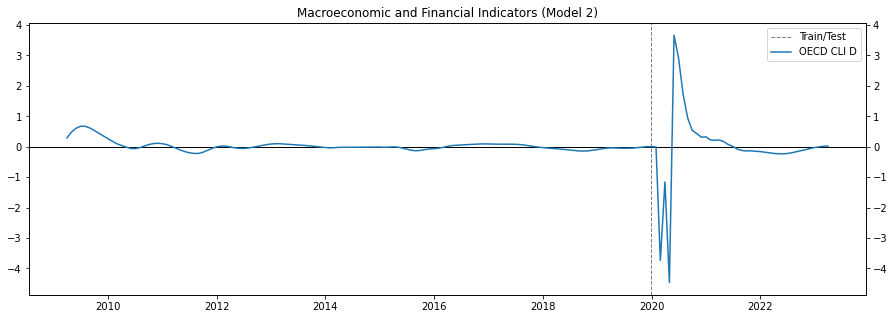

<Figure size 432x288 with 0 Axes>

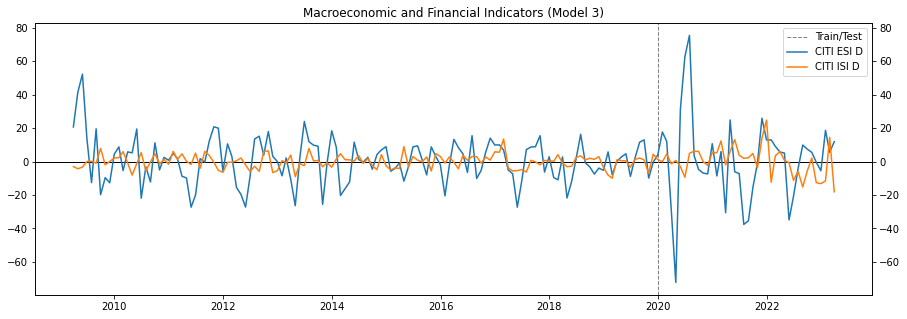

<Figure size 432x288 with 0 Axes>

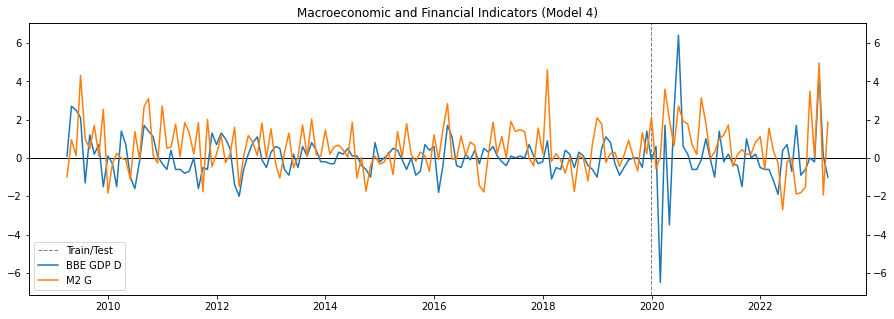

<Figure size 432x288 with 0 Axes>

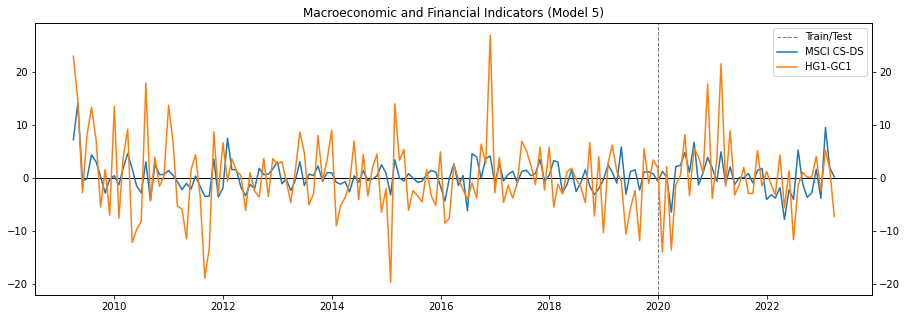

<Figure size 432x288 with 0 Axes>

In [25]:
models = [['OECD CLI D'], ['CITI ESI D', 'CITI ISI D'], ['BBE GDP D', 'M2 G'], ['MSCI CS-DS', 'HG1-GC1']]

number = 1

for i in models:
    number += 1
    plt.figure(figsize = (15, 5))
    ax1 = plt.gca()
    ax1.axhline(y = 0, color = 'black', linewidth = 1)
    date = mdates.datestr2num('2019-12-31')
    ax1.axvline(x = date, color = 'grey', linestyle = '--', linewidth = 1, label = 'Train/Test')
    for j in range(len(i)):
        ax1.plot(df.loc[(df.index >= pd.to_datetime('2009-03-31')) & 
                        (df.index < pd.to_datetime('2023-04-30'))][i[j]], label = i[j])
    ax1.legend()
    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())
    plt.title('Macroeconomic and Financial Indicators (Model ' + str(number) + ')')
    plt.show()
    plt.clf()

And some descriptive statistics for the training and the testing set (results are stored in the SQL table DES). 

In [26]:
columns = ['Country', 'Period', 'Statistic', 
           '2Y D', '2Y D F', '10Y D', '10Y D F', 'L D', 'S D', 'C D', 
           'OECD CLI D', 'CITI ESI D', 'CITI ISI D', 'BBE GDP D', 'M2 G', 'MSCI CS-DS', 'HG1-GC1']
values = []

for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['Train', 'Test']:
        for k in ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']:
            list_values = [i, j, k]
            list_values.extend([np.nan] * (len(columns) - 3))
            values.append(list_values)

df_des = pd.DataFrame(data = values, columns = columns)
df_des

,Country,Period,Statistic,2Y D,2Y D F,10Y D,10Y D F,L D,S D,C D,OECD CLI D,CITI ESI D,CITI ISI D,BBE GDP D,M2 G,MSCI CS-DS,HG1-GC1
0,US,Train,count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,Train,mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,Train,std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,Train,min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,Train,25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,CH,Test,min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,CH,Test,25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,CH,Test,50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,CH,Test,75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
con = sqlite3.connect('Database.db')

statistics = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
variables = ['2Y D', '2Y D F', '10Y D', '10Y D F', 'L D', 'S D', 'C D', 
             'OECD CLI D', 'CITI ESI D', 'CITI ISI D', 'BBE GDP D', 'M2 G', 'MSCI CS-DS', 'HG1-GC1']

for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['Train', 'Test']:
        df = pd.read_sql(sql = 'SELECT * FROM ' + i, con = con, parse_dates = ['Date'], index_col = 'Date')
        df[df.columns[4:]] = df[df.columns[4:]].shift(1)
        if j == 'Train':
            df = df.loc[(df.index >= pd.to_datetime('2009-04-30')) & 
                (df.index < pd.to_datetime('2020-01-31'))]
        else:
            df = df.loc[(df.index >= pd.to_datetime('2020-01-31'))]
        df = df.describe()
        for k in range(len(df.index)):
            filtered_row = df_des[(df_des['Country'] == i) & 
                                  (df_des['Period'] == j) & 
                                  (df_des['Statistic'] == statistics[k])]
            for l in variables:
                df_des.loc[filtered_row.index, l] = df[l][k]
                
con.close()

# Modeling

First, we load the packages.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

For our first approach, we split the data into a training and a testing period. The training set covers the period from April 2009 until December 2019 (129 observations), the testing set the period from January 2020 until April 2023 (40 observations).

Concept: We estimate the regression model. Given the regression residuals, we then conduct the Breusch-Pagan test to diagnose potential conditional heteroskedasticity and the Durbin-Watson test to diagnose potential serial correlation. Where appropriate, heteroskedasticity and serial correlation adjusted standard errors are used. Furthermore, we use the Shapiro-Wilk test to check the residuals’ distribution on normality and the variance inflation factor (VIF) to detect multicollinearity issues.

Test (OLS1_TST) and model (OLS1_RES) results are then stored in SQL tables.

In [29]:
columns = ['Country', 'Target', 'Model', 
           'BP Statistic', 'BP P-Value', 
           'DW Statistic', 'DW dL', 'DW 4-dL', 
           'SW Statistic', 'SW P-Value', 
           'VIF X1', 'VIF X2', 'VIF X3', 'VIF X4', 'VIF X5']
values = []

for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['2Y', '10Y']:
        for k in [1, 2, 3, 4, 5]:
            list_values = [i, j, k]
            list_values.extend([np.nan] * (len(columns) - 3))
            values.append(list_values)

df_tests = pd.DataFrame(data = values, columns = columns)
df_tests

,Country,Target,Model,BP Statistic,BP P-Value,DW Statistic,DW dL,DW 4-dL,SW Statistic,SW P-Value,VIF X1,VIF X2,VIF X3,VIF X4,VIF X5
0,US,2Y,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,2Y,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,2Y,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,2Y,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,2Y,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,CH,10Y,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,CH,10Y,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,CH,10Y,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,CH,10Y,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
columns = ['Country', 'Target', 'Model', 
           'B0', 'SE0', 
           'B1', 'SE1', 
           'B2', 'SE2', 
           'B3', 'SE3',
           'B4', 'SE4', 
           'B5', 'SE5', 
           'Adjusted R2', 'RMSE']
values = []

for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['2Y', '10Y']:
        for k in [0, 1, 2, 3, 4, 5]:
            list_values = [i, j, k]
            list_values.extend([np.nan] * (len(columns) - 3))
            values.append(list_values)

df_results = pd.DataFrame(values, columns = columns)
df_results

,Country,Target,Model,B0,SE0,B1,SE1,B2,SE2,B3,SE3,B4,SE4,B5,SE5,Adjusted R2,RMSE
0,US,2Y,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,2Y,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,2Y,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,2Y,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,2Y,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,CH,10Y,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,CH,10Y,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,CH,10Y,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,CH,10Y,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
con = sqlite3.connect('Database.db')

train_test_cutoff = pd.to_datetime('2020-01-31')

model_1 = ['L D', 'S D', 'C D']
model_2 = ['L D', 'S D', 'C D', 'OECD CLI D']
model_3 = ['L D', 'S D', 'C D', 'CITI ESI D', 'CITI ISI D']
model_4 = ['L D', 'S D', 'C D', 'BBE GDP D', 'M2 G']
model_5 = ['L D', 'S D', 'C D', 'MSCI CS-DS', 'HG1-GC1']

for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    df = pd.read_sql(sql = 'SELECT * FROM ' + i, con = con, parse_dates = ['Date'], index_col = 'Date')
    df[df.columns[4:]] = df[df.columns[4:]].shift(1)
    df = df[df.index >= pd.to_datetime('2009-04-30')]
    train = df[df.index < train_test_cutoff]
    test = df[df.index >= train_test_cutoff]
    for j in ['2Y', '10Y']:
        Y_train = train[j + ' D']
        Y_test = test[j + ' D']
        for k in [0, 1, 2, 3, 4, 5]:
            filtered_row_tests = df_tests[(df_tests['Country'] == i) & (df_tests['Target'] == j) & (df_tests['Model'] == k)]
            filtered_row_results = df_results[(df_results['Country'] == i) & (df_results['Target'] == j) & (df_results['Model'] == k)]
            if k == 0:
                X_test = test[j + ' D F']
                RMSE = np.sqrt(np.mean((X_test - Y_test) ** 2))
                df_results.loc[filtered_row_results.index, 'RMSE'] = RMSE
            else:
                if k == 1:
                    X = model_1
                if k == 2:
                    X = model_2
                if k == 3:
                    X = model_3
                if k == 4:
                    X = model_4
                if k == 5:
                    X = model_5
                X_train = sm.add_constant(train[X])
                X_test = sm.add_constant(test[X])
                model = sm.OLS(Y_train, X_train)
                results = model.fit()
                BP_test = het_breuschpagan(results.resid, X_train)
                DW_test = durbin_watson(results.resid)
                if X == model_1:
                    DW_dL = 1.69 # Lower Critical Value for Durbin-Watson Statistic for a = 0.05, n = 150, k = 3
                if X == model_2:
                    DW_dL = 1.68 # Lower Critical Value for Durbin-Watson Statistic for a = 0.05, n = 150, k = 4
                if X in [model_3, model_4, model_5]:
                    DW_dL = 1.66 # Lower Critical Value for Durbin-Watson Statistic for a = 0.05, n = 150, k = 5
                SW_test = shapiro(results.resid)
                VIF = []
                for l in range(len(X)):
                    VIF.append(variance_inflation_factor(X_train.values, l))            
                df_tests.loc[filtered_row_tests.index, 'BP Statistic'] = BP_test[2]
                df_tests.loc[filtered_row_tests.index, 'BP P-Value'] = BP_test[3]
                df_tests.loc[filtered_row_tests.index, 'DW Statistic'] = DW_test
                df_tests.loc[filtered_row_tests.index, 'DW dL'] = DW_dL
                df_tests.loc[filtered_row_tests.index, 'DW 4-dL'] = 4 - DW_dL
                df_tests.loc[filtered_row_tests.index, 'SW Statistic'] = SW_test[0]
                df_tests.loc[filtered_row_tests.index, 'SW P-Value'] = SW_test[1]
                for l in range(len(X)):
                    df_tests.loc[filtered_row_tests.index, 'VIF X' + str(l + 1)] = VIF[l]
                if (BP_test[3] <= 0.05) or (DW_test <= DW_dL) or (DW_test >= 4 - DW_dL):
                    results = model.fit(cov_type = 'HAC', cov_kwds = {'maxlags':1})
                for l in range(len(X) + 1):
                    df_results.loc[filtered_row_results.index, 'B' + str(l)] = results.params[l]
                    df_results.loc[filtered_row_results.index, 'SE' + str(l)] = results.bse[l]
                df_results.loc[filtered_row_results.index, 'Adjusted R2'] = results.rsquared_adj
                RMSE = np.sqrt(np.mean((results.predict(X_test) - Y_test) ** 2))
                df_results.loc[filtered_row_results.index, 'RMSE'] = RMSE

df_tests.to_sql(name = 'OLS1_TST', con = con, if_exists = 'replace')
df_results.to_sql(name = 'OLS1_RES', con = con, if_exists = 'replace')

con.close()

In [32]:
df_tests.round(4)

,Country,Target,Model,BP Statistic,BP P-Value,DW Statistic,DW dL,DW 4-dL,SW Statistic,SW P-Value,VIF X1,VIF X2,VIF X3,VIF X4,VIF X5
0,US,2Y,1,0.4826,0.6950,2.0124,1.69,2.31,0.9708,0.0069,1.0162,2.6118,1.9200,NaN,NaN
1,US,2Y,2,0.8848,0.4752,2.0110,1.68,2.32,0.9710,0.0071,1.0643,2.6239,2.0242,1.5994,NaN
2,US,2Y,3,0.3018,0.9110,2.0244,1.66,2.34,0.9675,0.0034,1.0217,2.6455,2.0085,1.6199,1.0960
3,US,2Y,4,0.8698,0.5036,1.9983,1.66,2.34,0.9710,0.0073,1.2067,2.7116,1.9385,1.5792,1.1555
4,US,2Y,5,0.6105,0.6920,1.9943,1.66,2.34,0.9674,0.0034,1.0593,3.0879,1.9963,1.6704,1.5256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,CH,10Y,1,2.4642,0.0655,1.9771,1.69,2.31,0.9932,0.7921,1.0369,1.1046,1.3120,NaN,NaN
56,CH,10Y,2,2.3010,0.0624,1.9838,1.68,2.32,0.9951,0.9398,1.0733,1.1142,1.3135,1.2084,NaN
57,CH,10Y,3,1.6318,0.1565,1.9355,1.66,2.34,0.9923,0.7062,1.0419,1.1400,1.3136,1.2134,1.0364
58,CH,10Y,4,1.9966,0.0837,1.9716,1.66,2.34,0.9951,0.9379,1.2395,1.1708,1.3147,1.2327,1.0838


In [33]:
df_results.round(4)

,Country,Target,Model,B0,SE0,B1,SE1,B2,SE2,B3,SE3,B4,SE4,B5,SE5,Adjusted R2,RMSE
0,US,2Y,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2974
1,US,2Y,1,0.0074,0.0116,-0.1325,0.1279,0.1250,0.1100,0.0368,0.1137,NaN,NaN,NaN,NaN,-0.0065,0.3328
2,US,2Y,2,0.0057,0.0119,-0.1265,0.1284,0.1073,0.1132,0.0457,0.1146,0.0522,0.0758,NaN,NaN,-0.0108,0.3302
3,US,2Y,3,0.0068,0.0116,-0.1340,0.1291,0.1146,0.1129,0.0536,0.1155,0.0009,0.0009,0.0015,0.0029,-0.0131,0.3344
4,US,2Y,4,0.0046,0.0127,-0.1421,0.1309,0.1159,0.1111,0.0381,0.1143,0.0101,0.0151,0.0044,0.0103,-0.0168,0.3292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,CH,10Y,1,-0.0212,0.0129,-0.0617,0.1257,-0.1251,0.1185,-0.1438,0.1363,NaN,NaN,NaN,NaN,-0.0065,0.2239
68,CH,10Y,2,-0.0248,0.0130,-0.0793,0.1256,-0.1311,0.1180,-0.1581,0.1359,0.1205,0.0795,NaN,NaN,0.0038,0.2938
69,CH,10Y,3,-0.0218,0.0129,-0.0910,0.1276,-0.1270,0.1185,-0.1624,0.1368,0.0010,0.0010,0.0034,0.0032,-0.0051,0.2231
70,CH,10Y,4,-0.0211,0.0140,-0.1108,0.1291,-0.1218,0.1184,-0.1462,0.1377,0.0258,0.0160,-0.0042,0.0113,-0.0016,0.2407


We now switch to rolling-window regression and dynamic model selection, our second approach. Here, we generate forecasts for all the months from April 2012 to April 2023. For each of these months, we estimate an OLS regression over the last 36 months for each of the five specified models, and then use the model with the best in-sample performance (highest adjusted R-squared) to forecast the next month. The results are then stored in the SQL table OLS2_RES.

In [34]:
columns = ['Country', 'Target', 'Month', 
           'Model', 
           'Estimate', 'Actual']
values = []
dates = pd.date_range(start = '2009-04-30', end = '2023-04-30', freq = 'M').to_list()
dates = dates[36:]

for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['2Y', '10Y']:
        for k in dates:
            for l in [0, 1]:
                list_values = [i, j, k, l]
                list_values.extend([np.nan] * (len(columns) - 4))
                values.append(list_values)

df_results = pd.DataFrame(values, columns = columns)
df_results.head()

,Country,Target,Month,Model,Estimate,Actual
0,US,2Y,2012-04-30,0,NaN,NaN
1,US,2Y,2012-04-30,1,NaN,NaN
2,US,2Y,2012-05-31,0,NaN,NaN
3,US,2Y,2012-05-31,1,NaN,NaN
4,US,2Y,2012-06-30,0,NaN,NaN


In [35]:
con = sqlite3.connect('Database.db')

model_1 = ['L D', 'S D', 'C D']
model_2 = ['L D', 'S D', 'C D', 'OECD CLI D']
model_3 = ['L D', 'S D', 'C D', 'CITI ESI D', 'CITI ISI D']
model_4 = ['L D', 'S D', 'C D', 'BBE GDP D', 'M2 G']
model_5 = ['L D', 'S D', 'C D', 'MSCI CS-DS', 'HG1-GC1']
models = [model_1, model_2, model_3, model_4, model_5]

for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    df = pd.read_sql(sql = 'SELECT * FROM ' + i, con = con, parse_dates = ['Date'], index_col = 'Date')
    df[df.columns[4:]] = df[df.columns[4:]].shift(1)
    df = df[df.index >= pd.to_datetime('2009-04-30')]
    for j in range(df.shape[0] - 36):
        start = df.index[j]
        end = df.index[j + 35]
        window = df[start:end]
        for k in ['2Y', '10Y']:
            Y_train = window[k + ' D']
            coefficients = []
            performance = []
            for l in [0, 1, 2, 3, 4, 5]:
                if l == 0:
                    filtered_row = df_results[(df_results['Country'] == i) & 
                                              (df_results['Target'] == k) & 
                                              (df_results['Month'] == df.index[j + 36]) & 
                                              (df_results['Model'] == 0)]
                    df_results.loc[filtered_row.index, 'Estimate'] = df.loc[df.index[j + 36], k + ' D F']
                    df_results.loc[filtered_row.index, 'Actual'] = df.loc[df.index[j + 36], k + ' D']
                else:
                    if l == 1:
                        X = model_1
                    if l == 2:
                        X = model_2
                    if l == 3:
                        X = model_3
                    if l == 4:
                        X = model_4
                    if l == 5:
                        X = model_5
                    X_train = sm.add_constant(window[X])
                    model = sm.OLS(Y_train, X_train)
                    results = model.fit()
                    BP_test = het_breuschpagan(results.resid, X_train)
                    DW_test = durbin_watson(results.resid)
                    if X == model_1:
                        DW_dL = 1.69 # Lower Critical Value for Durbin-Watson Statistic for a = 0.05, n = 150, k = 3
                    if X == model_2:
                        DW_dL = 1.68 # Lower Critical Value for Durbin-Watson Statistic for a = 0.05, n = 150, k = 4
                    if X in [model_3, model_4, model_5]:
                        DW_dL = 1.66 # Lower Critical Value for Durbin-Watson Statistic for a = 0.05, n = 150, k = 5
                    if (BP_test[3] <= 0.05) or (DW_test <= DW_dL) or (DW_test >= 4 - DW_dL):
                        results = model.fit(cov_type = 'HAC', cov_kwds = {'maxlags':1})
                    coefficients.append(results.params)
                    performance.append(results.rsquared_adj)
            filtered_row = df_results[(df_results['Country'] == i) & 
                                      (df_results['Target'] == k) & 
                                      (df_results['Month'] == df.index[j + 36]) & 
                                      (df_results['Model'] == 1)]
            coefficients = coefficients[performance.index(max(performance))]
            X_test = [1] + df.loc[df.index[j + 36], models[performance.index(max(performance))]].to_list()
            df_results.loc[filtered_row.index, 'Estimate'] = sm.OLS.predict(self = X_test, 
                                                                            params = coefficients, 
                                                                            exog = X_test)
            df_results.loc[filtered_row.index, 'Actual'] = df.loc[df.index[j + 36], k + ' D']
            df_results.loc[filtered_row.index, 'Model'] = performance.index(max(performance)) + 1

df_results.to_sql(name = 'OLS2_RES', con = con, if_exists = 'replace') 

con.close()

In [36]:
df_results = df_results.set_index('Month')
df_results.round(4)

,Country,Target,Model,Estimate,Actual
Month,,,,,
2012-04-30,US,2Y,0,0.0275,-0.074
2012-04-30,US,2Y,1,0.0079,-0.074
2012-05-31,US,2Y,0,0.0213,0.004
2012-05-31,US,2Y,1,-0.0477,0.004
2012-06-30,US,2Y,0,0.0184,0.039
...,...,...,...,...,...
2023-02-28,CH,10Y,5,0.0049,0.187
2023-03-31,CH,10Y,0,-0.0111,-0.225
2023-03-31,CH,10Y,4,0.0797,-0.225


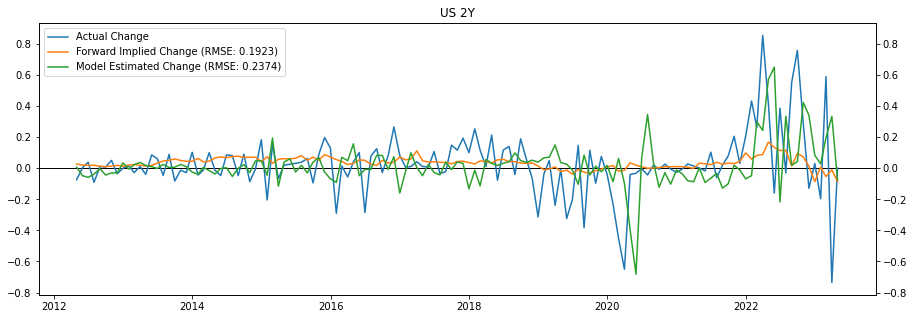

<Figure size 432x288 with 0 Axes>

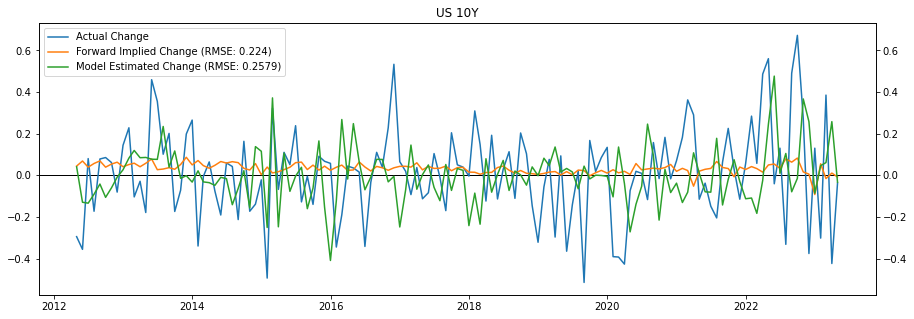

<Figure size 432x288 with 0 Axes>

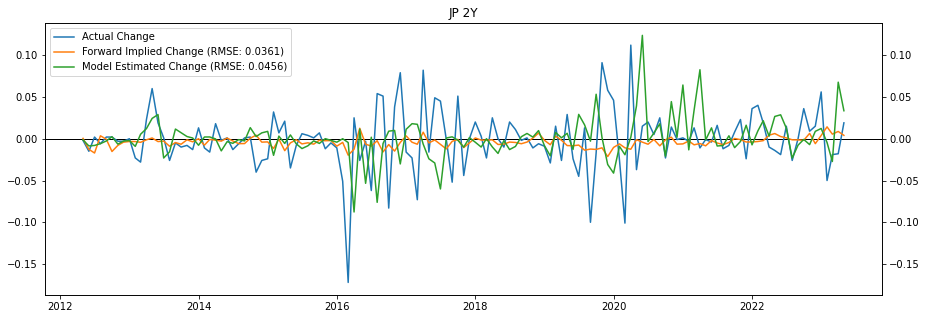

<Figure size 432x288 with 0 Axes>

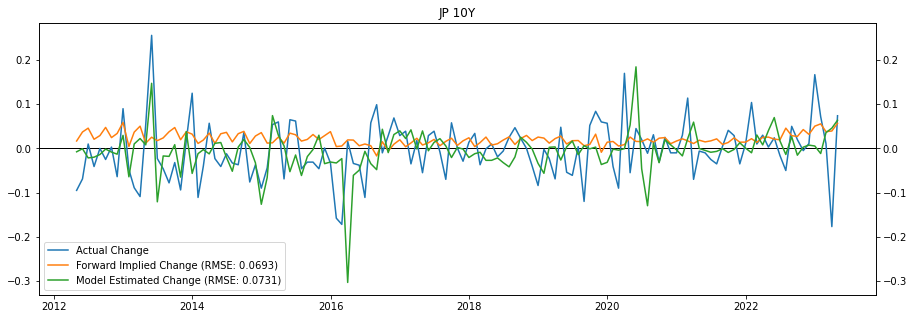

<Figure size 432x288 with 0 Axes>

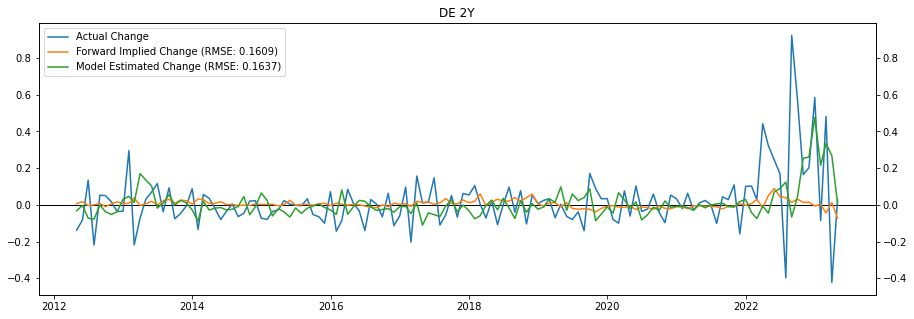

<Figure size 432x288 with 0 Axes>

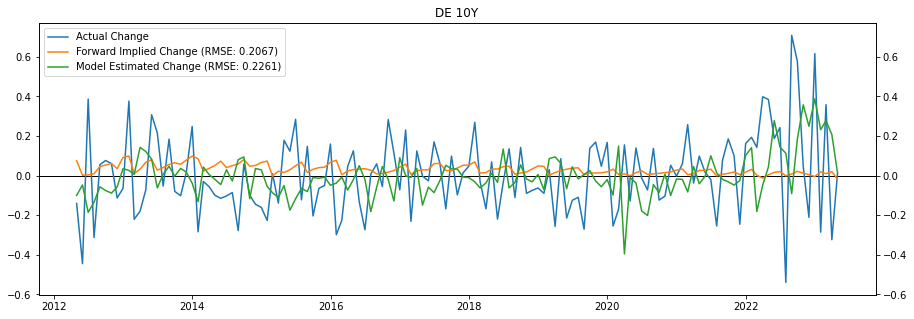

<Figure size 432x288 with 0 Axes>

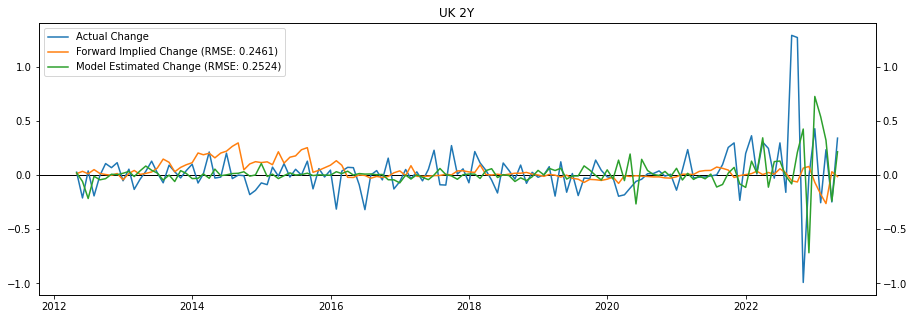

<Figure size 432x288 with 0 Axes>

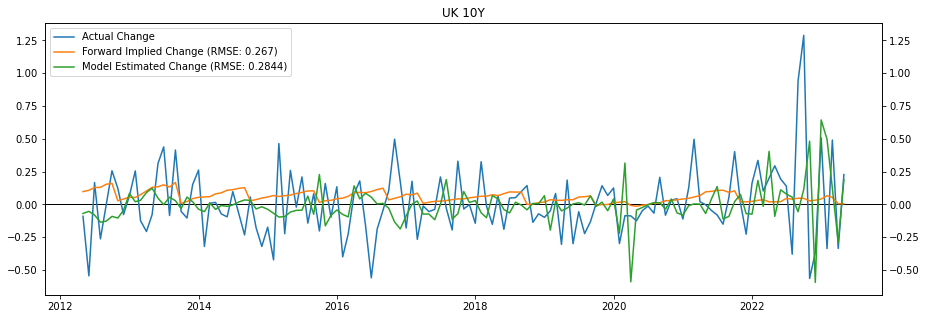

<Figure size 432x288 with 0 Axes>

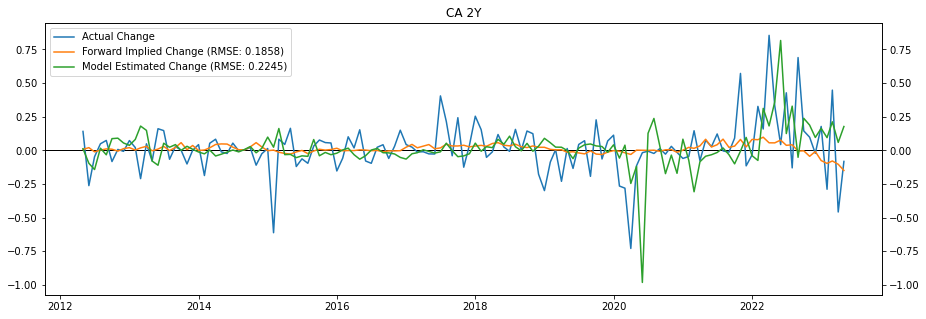

<Figure size 432x288 with 0 Axes>

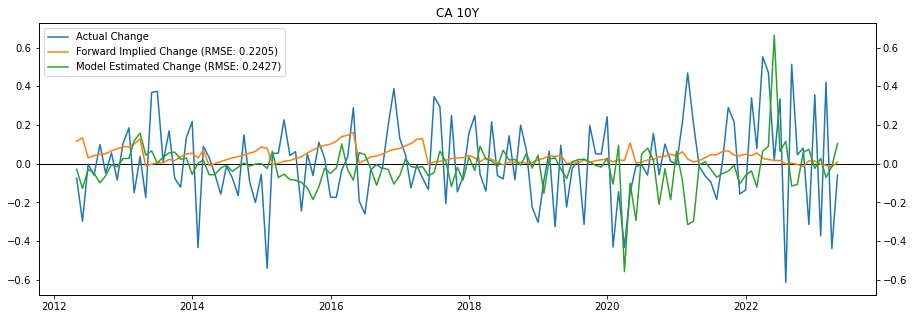

<Figure size 432x288 with 0 Axes>

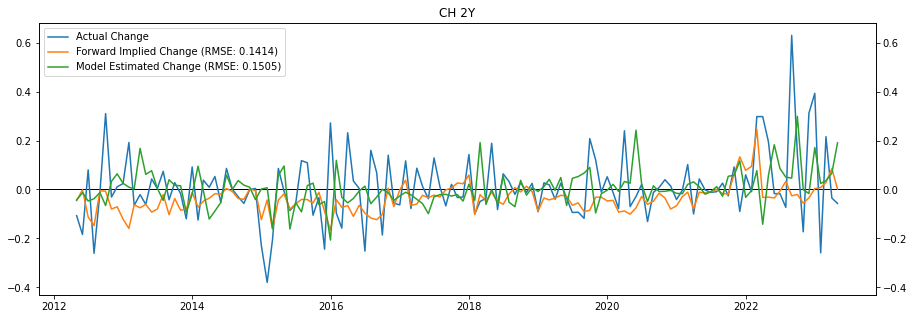

<Figure size 432x288 with 0 Axes>

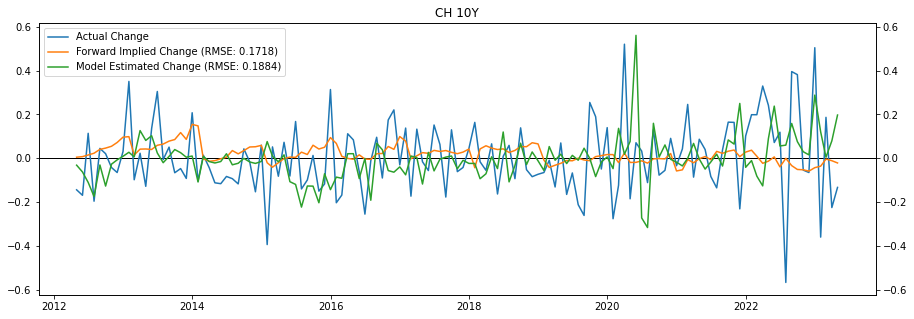

<Figure size 432x288 with 0 Axes>

In [37]:
for i in ['US', 'JP', 'DE', 'UK', 'CA', 'CH']:
    for j in ['2Y', '10Y']:
        actual = df_results.loc[(df_results['Country'] == i) & 
                   (df_results['Target'] == j) & 
                   (df_results['Model'] == 0), 
                   'Actual']
        forward = df_results.loc[(df_results['Country'] == i) & 
                   (df_results['Target'] == j) & 
                   (df_results['Model'] == 0), 
                   'Estimate']
        model = df_results.loc[(df_results['Country'] == i) & 
                   (df_results['Target'] == j) & 
                   (df_results['Model'] != 0), 
                   'Estimate']
        plt.figure(figsize = (15, 5))
        ax1 = plt.gca()
        ax1.axhline(y = 0, color = 'black', linewidth = 1)
        ax1.plot(actual, label = 'Actual Change')
        RMSE = np.sqrt(np.mean((forward - actual) ** 2)).round(4)
        ax1.plot(forward, label = 'Forward Implied Change (RMSE: ' + str(RMSE) + ')')
        RMSE = np.sqrt(np.mean((model - actual) ** 2)).round(4)
        ax1.plot(model, label = 'Model Estimated Change (RMSE: ' + str(RMSE) + ')')
        ax1.legend()
        ax2 = ax1.twinx()
        ax2.set_ylim(ax1.get_ylim())
        plt.title(i + ' ' + j)
        plt.show()
        plt.clf()